#

In [1]:
from system_development.strategies.trend_pullback_v1.run_backtest import run_backtest_for_default_universe
from system_development.strategies.trend_pullback_v1.config import StrategyParams


=== Running backtest for ^GSPC ===

Signal counts for ^GSPC:
Signal
0    1978
1      82
Name: count, dtype: int64

Exit breakdown for ^GSPC:
  All trades       :   48 trades, avg holding   0.31 days
  stop          :   20 trades, avg holding   0.38 days
  tp            :    3 trades, avg holding   0.92 days
  trend_exit    :   25 trades, avg holding   0.17 days


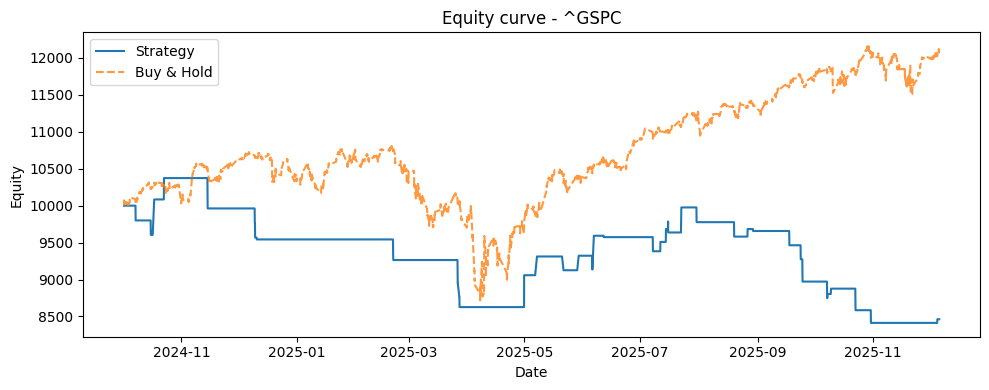


=== Running backtest for ^NDX ===

Signal counts for ^NDX:
Signal
0    1960
1     102
Name: count, dtype: int64

Exit breakdown for ^NDX:
  All trades       :   53 trades, avg holding   0.44 days
  trend_exit    :   25 trades, avg holding   0.10 days
  stop          :   21 trades, avg holding   0.70 days
  tp            :    7 trades, avg holding   0.86 days


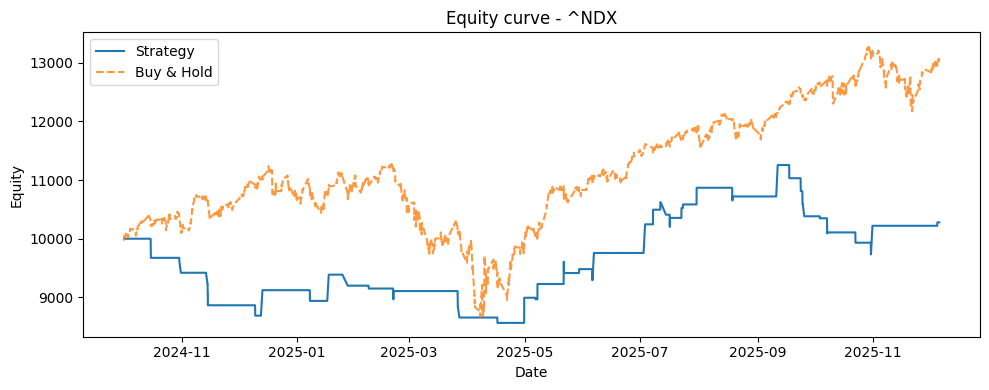


=== Running backtest for ^FTSE ===

Signal counts for ^FTSE:
Signal
0    2592
1     104
Name: count, dtype: int64

Exit breakdown for ^FTSE:
  All trades       :   45 trades, avg holding   0.74 days
  tp            :    7 trades, avg holding   2.15 days
  trend_exit    :   23 trades, avg holding   0.35 days
  stop          :   15 trades, avg holding   0.68 days


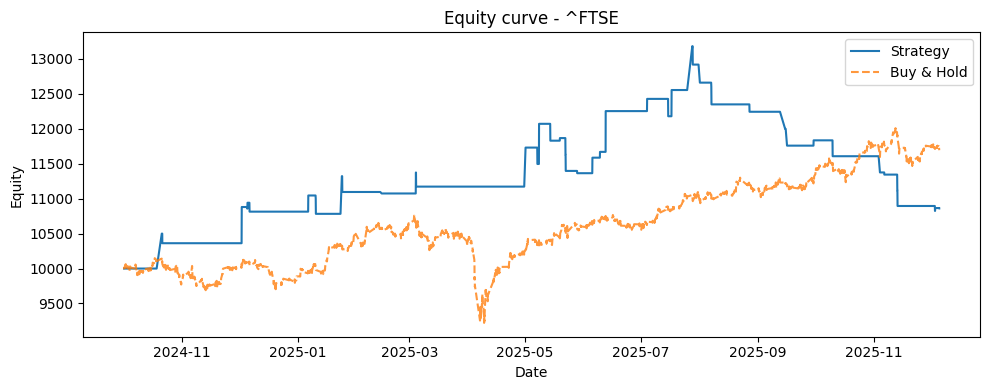


=== Running backtest for GBPUSD=X ===

Signal counts for GBPUSD=X:
Signal
 0    6928
-1     200
 1     189
Name: count, dtype: int64

Exit breakdown for GBPUSD=X:
  All trades       :  208 trades, avg holding   0.18 days
  tp            :   33 trades, avg holding   0.39 days
  stop          :   87 trades, avg holding   0.15 days
  trend_exit    :   88 trades, avg holding   0.12 days


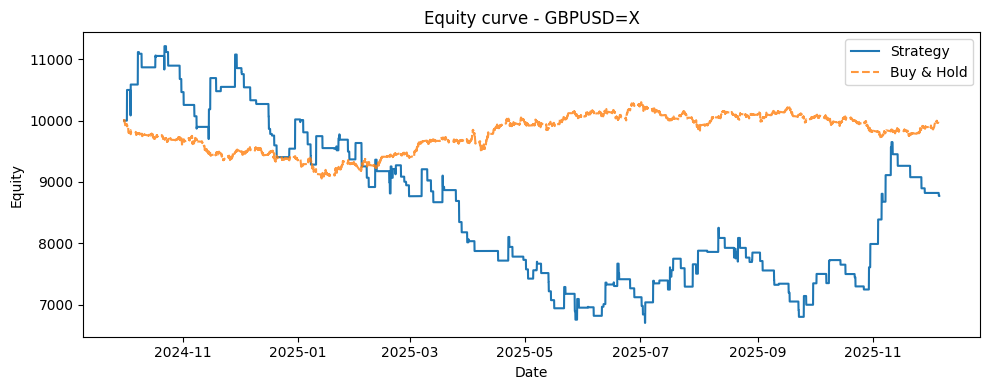


=== Running backtest for EURUSD=X ===

Signal counts for EURUSD=X:
Signal
 0    6871
 1     249
-1     197
Name: count, dtype: int64

Exit breakdown for EURUSD=X:
  All trades       :  235 trades, avg holding   0.19 days
  tp            :   50 trades, avg holding   0.39 days
  stop          :   79 trades, avg holding   0.18 days
  trend_exit    :  106 trades, avg holding   0.09 days


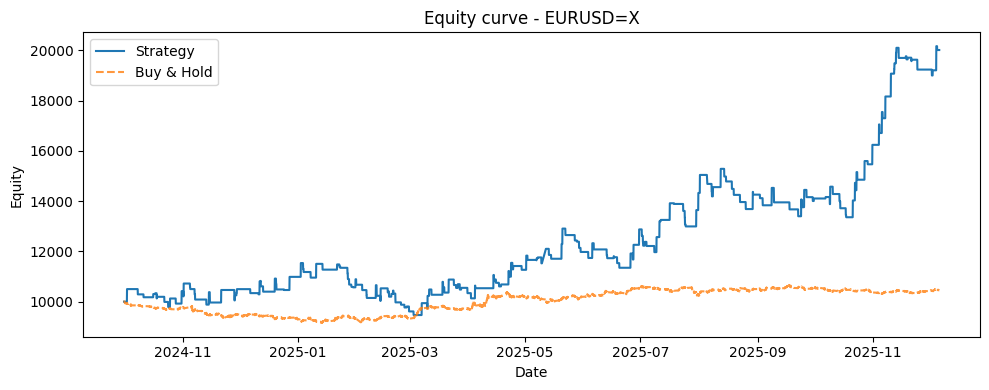


=== Backtest statistics for PORTFOLIO_EQUAL_WEIGHT ===
start_equity        : 10000.0000
end_equity          : 14390.1376
total_return_pct    :    43.90%
max_drawdown_pct    :   -16.43%
num_trades          : 589.0000
win_rate_pct        :    36.84%
avg_win             : 309.3862
avg_loss            : -160.9719
profit_factor       :   1.1427
sharpe_ratio        :   1.0882


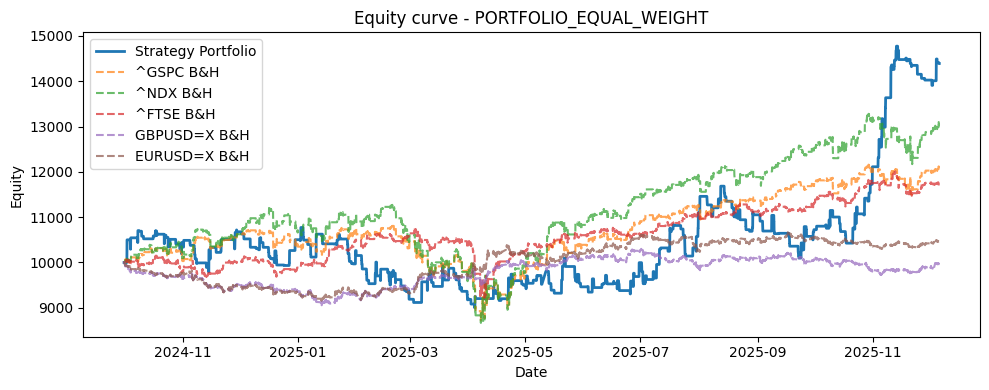


=== Backtest statistics for ^GSPC ===
start_equity        : 10000.0000
end_equity          : 8462.3152
total_return_pct    :   -15.38%
max_drawdown_pct    :   -18.90%
num_trades          :  48.0000
win_rate_pct        :    37.50%
avg_win             : 173.9102
avg_loss            : -155.6023
profit_factor       :   0.6706
sharpe_ratio        :  -1.8973

=== Backtest statistics for ^NDX ===
start_equity        : 10000.0000
end_equity          : 10278.8364
total_return_pct    :     2.79%
max_drawdown_pct    :   -14.34%
num_trades          :  53.0000
win_rate_pct        :    39.62%
avg_win             : 253.3128
avg_loss            : -157.5229
profit_factor       :   1.0553
sharpe_ratio        :   0.4141

=== Backtest statistics for ^FTSE ===
start_equity        : 10000.0000
end_equity          : 10860.6399
total_return_pct    :     8.61%
max_drawdown_pct    :   -17.89%
num_trades          :  45.0000
win_rate_pct        :    37.78%
avg_win             : 325.1771
avg_loss            : -16

In [2]:
if __name__ == "__main__":

    params_cash = StrategyParams(
        entry_mode="deep_pullback",
        equity_mode="cqash",
        exit_mode="fixed_rr",
        tp_atr_mult=2.5,
        risk_per_trade=0.02,
    )


    results_cash = run_backtest_for_default_universe(
        params=params_cash,
        start="2024-10-01",
        end=None,
        interval="1h",
        plot=True,
        portfolio=True,
        show_benchmark=True,
    )



In [ ]:
params_mtm = StrategyParams(
            entry_mode="deep_pullback",
            equity_mode="mtm",
            exit_mode="fixed_rr",
            tp_atr_mult=2.5,
            risk_per_trade=0.02,
        )

results_mtm = run_backtest_for_default_universe(
    params=params_mtm,
    start="2024-01-01",
    end=None,
    interval="4h",
    plot=True,
    portfolio=True,
    show_benchmark=True,
)


In [ ]:
# Then try shallow pullbacks
params_shallow = StrategyParams(
    entry_mode="shallow_pullback",
    exit_mode="fixed_rr",
    tp_atr_mult=2.5,
    risk_per_trade=0.02,
)

results_shallow = run_backtest_for_default_universe(
    params=params_shallow,
    start="2024-01-01",
    end=None,
    interval="1d",
    plot=True,
    portfolio=True,
    show_benchmark=True,
)

In [ ]:

# And the rebound-cross version
params_rebound = StrategyParams(
    entry_mode="rebound_cross",
    exit_mode="fixed_rr",
    tp_atr_mult=2.5,
    risk_per_trade=0.02,
)

results_rebound = run_backtest_for_default_universe(
    params=params_rebound,
    start="2024-01-01",
    end=None,
    interval="1d",
    plot=True,
    portfolio=True,
    show_benchmark=True,
)

# Debug

In [ ]:
from system_development.engine.data_loader import download_price_data
from system_development.strategies.trend_pullback_v1.config import DEFAULT_PARAMS
from system_development.strategies.trend_pullback_v1.rules import prepare_dataframe

symbol = "^GSPC"

raw = download_price_data(symbol, start="2015-01-01", interval="1d")
df = prepare_dataframe(raw, DEFAULT_PARAMS)

df["Signal"].value_counts()
df[["Close", "EMA_Fast", "EMA_Slow", "RSI", "ADX", "Trend", "Signal"]].tail()
